In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns 
import glob as gb
%matplotlib inline

In [86]:
header_row = ['age','sex','cp','BP','chol','fbs','ecg','maxhr','eiang','eist','slope','vessels','thal','diagnosis']
df = pd.read_excel("C:/Users/carllel colquhoun/Desktop/PYTHON FILES/LabWeek5/CardiologyNumerical.xls",names=header_row) 

In [87]:
#removal of first two rows(except header)
df = df.drop([0,1],axis=0)

In [88]:
df.head()

,age,sex,cp,BP,chol,fbs,ecg,maxhr,eiang,eist,slope,vessels,thal,diagnosis
2,60,1,4,130,206,0,2,132,1,2.4,2,2,7,0
3,49,1,2,130,266,0,0,171,0,0.6,1,0,3,1
4,64,1,1,110,211,0,2,144,1,1.8,2,0,3,1
5,63,1,4,130,254,0,2,147,0,1.4,2,1,7,0
6,53,1,4,140,203,1,2,155,1,3.1,3,0,7,0


In [ ]:
#Is there a relationship between Cholesterol and Age ,
#Blood pressure and Age, Maximum Heart Rate and Age,  Cholesterol and High blood pressure?
#Approache- Linear Regression
#least squares criterion, which means we are find the line (mathematically) which minimizes the sum of squared residuals

In [111]:
#collection of features to analyze
ws=df.loc[:303,('age','cp','BP','chol','maxhr')]

In [112]:
ws.head()

,age,cp,BP,chol,maxhr
2,60,4,130,206,132
3,49,2,130,266,171
4,64,1,110,211,144
5,63,4,130,254,147
6,53,4,140,203,155


In [115]:
ws.age = ws.age.astype(float)
ws.cp = ws.cp.astype(float)
ws.BP = ws.BP.astype(float)
ws.chol = ws.chol.astype(float)
ws.maxhr = ws.maxhr.astype(float)

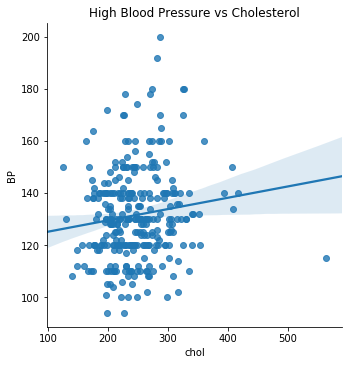

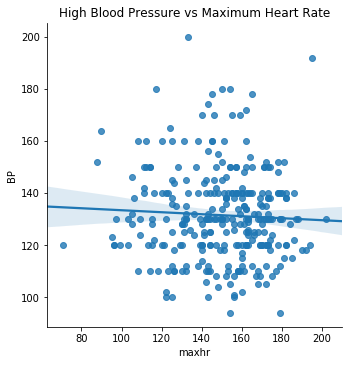

In [214]:
#Cross Analysis of multiple Variables
#sns.lmplot(x='BP', y='age', data=ws)
#plt.title('Age vs Blood Pressure')
#plt.show()

#sns.lmplot(x='chol', y='age', data=ws)
#plt.title('Age vs Cholesterol')
#plt.show()

#sns.lmplot(x='maxhr', y='age', data=ws)
#plt.title('Age vs Maximum Heart Rate')
#plt.show()

sns.lmplot(x='chol', y='BP', data=ws)
plt.title('High Blood Pressure vs Cholesterol')
plt.show()

sns.lmplot(x='maxhr', y='BP', data=ws)
plt.title('High Blood Pressure vs Maximum Heart Rate')
plt.show()


In [215]:
#Interpret visualization
#What does the slope downwards means?


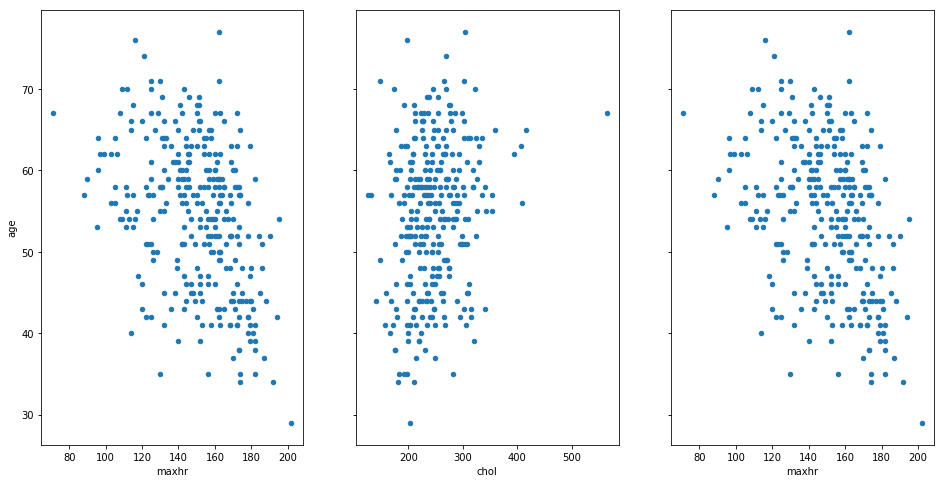

In [216]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
ws.plot(kind='scatter', x='maxhr', y='age', ax=axs[0], figsize=(16, 8))
ws.plot(kind='scatter', x='chol', y='age', ax=axs[1])
ws.plot(kind='scatter', x='maxhr', y='age', ax=axs[2])



In [217]:
#Regression plot between Cholesterol vs Age
#plt.scatter(ws['chol'], ws['age'], label='data', color='red', marker='o')
#sns.regplot(x='chol', y='age', data=ws, order=7)

In [218]:
#Statsmodels to estimate the model coefficients for the conditions:

import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='BP ~ chol', data=ws).fit()
# print the coefficients
lm.params


Intercept    120.841062
chol           0.043377
dtype: float64